# 1. Logistic Regression

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

data_file_1 = Path(os.path.abspath("")) / "data" / "ex2data1.txt"
data_set_1 = pd.read_csv(data_file_1, header=None, names=["Score_1", "Score_2", "Admitted"])
# print(data_set_1)
# print(data_set_1.head())
# print(data_set_1.describe())

x = np.array(data_set_1.iloc[:, 0:2])
y = np.array(data_set_1.iloc[:, 2:])
m, n = x.shape
print(m, n)
print(x)
print(y)

100 2
[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95445795]
 [80.19018075 44.82162893]
 [93.1143888  38.80067034]
 [61.83020602 50.25610789]
 [38.7858038  64.99568096]
 [61.37928945 72.80788731]
 [85.40451939 57.05198398]
 [52.10797973 63.12762377]
 [52.04540477 69.43286012]
 [40.23689374 71.16774802]
 [54.63510555 52.21388588]
 [33.91550011 98.86943

## 1.1 Visualizing the data

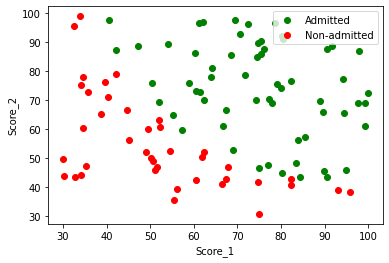

In [2]:
# init empty array with dimensions
admitted_list = np.empty((0, 3))
non_admitted_list = np.empty((0, 3))

for record in np.array(data_set_1):
    if record[2] == 1:
        admitted_list = np.append(admitted_list, [record], axis=0)
    else:
        non_admitted_list = np.append(non_admitted_list, [record], axis=0)

# simple way to init
# admitted_list = np.array([record for record in np.array(data_set_1) if record[2] == 1])
# non_admitted_list = np.array([record for record in np.array(data_set_1) if record[2] == 0])

# print(admitted_list)
# print(non_admitted_list)

plt.plot(admitted_list[:, 0], admitted_list[:, 1], 'go', label="Admitted")
plt.plot(non_admitted_list[:, 0], non_admitted_list[:, 1], 'ro', label="Non-admitted")
plt.xlabel("Score_1")
plt.ylabel("Score_2")
plt.legend(loc="upper right")
plt.show()


## 1.2 Implementation
### 1.2.1 Sigmoid function

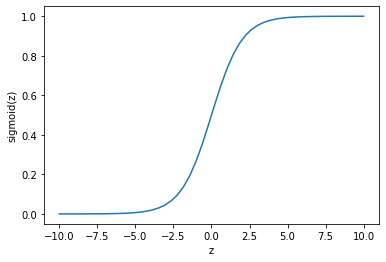

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# draw sigmoid
sigmoid_x = np.linspace(-10, 10)
sigmoid_y = sigmoid(sigmoid_x)
plt.plot(sigmoid_x, sigmoid_y)
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.show()

### 1.2.2 Cost function and gradient

In [4]:
X = np.insert(x, 0, np.ones(m), axis=1)
# print(X)
init_theta = np.zeros((n + 1, 1))
# print(init_theta)

def cost(theta, X, y):
    h = sigmoid(X @ theta)
    m = X.shape[0]
    j = 1 / m * (-y.T @ np.log(h) - (1 - y).T @ np.log(1 - h))
    return j.item()

def gradient(theta, X, y):
    m = X.shape[0]
    gradient = 1 / m * X.T @ (sigmoid(X @ theta) - y)
    return gradient

# cost and gradient when theta = [[0], [0], [0]]
print(cost(init_theta, X, y))
print(gradient(init_theta, X, y))

# cost and gradient when theta = [[-24], [0.2], [0.2]]
print(cost(np.matrix([[-24], [0.2], [0.2]]), X, y))
print(gradient(np.matrix([[-24], [0.2], [0.2]]), X, y))

0.6931471805599453
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
0.2183301938265978
[[0.04290299]
 [2.56623412]
 [2.64679737]]


### 1.2.3 Learning parameters using library

fun: 0.20349770158947486
     jac: array([8.96434684e-09, 8.32054132e-08, 4.74480494e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131857,   0.20623159,   0.20147149])
[-25.16131857   0.20623159   0.20147149]
[30.05882245 30.76356018 31.46829791 32.17303564 32.87777337 33.5825111
 34.28724883 34.99198656 35.69672429 36.40146202 37.10619975 37.81093749
 38.51567522 39.22041295 39.92515068 40.62988841 41.33462614 42.03936387
 42.7441016  43.44883933 44.15357706 44.85831479 45.56305252 46.26779026
 46.97252799 47.67726572 48.38200345 49.08674118 49.79147891 50.49621664
 51.20095437 51.9056921  52.61042983 53.31516756 54.01990529 54.72464303
 55.42938076 56.13411849 56.83885622 57.54359395 58.24833168 58.95306941
 59.65780714 60.36254487 61.0672826  61.77202033 62.47675806 63.18149579
 63.88623353 64.59097126 65.29570899 66.00044672 66.70518445 67.40992218
 68.11465991 68.81939764 69.52413537 70.2288731  70.9

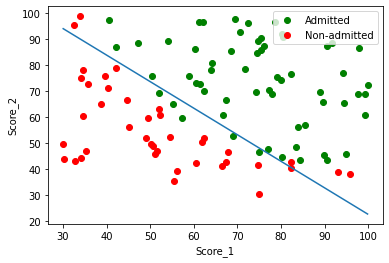

In [5]:
# use TNC algorithm to find best theta
# notice that y need to be 1-d array when using this method
res = opt.minimize(fun = cost, x0 = init_theta, args = (X, y.flatten()), method = 'TNC', jac = gradient)
learned_theta = res.x
print(res)
print(learned_theta)

# draw decision boundary
res_x1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
res_x2 = (0 - learned_theta[0] - learned_theta[1] * res_x1) / learned_theta[2]
print(res_x1)
print(res_x2)

plt.plot(admitted_list[:, 0], admitted_list[:, 1], 'go', label="Admitted")
plt.plot(non_admitted_list[:, 0], non_admitted_list[:, 1], 'ro', label="Non-admitted")
plt.plot(res_x1, res_x2, "-")
plt.xlabel("Score_1")
plt.ylabel("Score_2")
plt.legend(loc="upper right")
plt.show()

### 1.2.4 Evaluating logistic regression

In [6]:
def hypothesis(theta, x):
    return sigmoid(theta.T @ x).item()

print("probability: {}".format(hypothesis(learned_theta, np.array([[1], [45], [85]]))))

def predict(theta, X):
    p = sigmoid(X @ theta)
    res = np.array([1 if record >= 0.5 else 0 for record in p])
    return res

predict_res = predict(learned_theta, X)
predict_accuracy = np.sum([1 if predict_res[i] == y[i][0] else 0 for i in range(len(y))]) / len(y)
print("accuracy on training data: {}".format(predict_accuracy))

probability: 0.7762906231399741
accuracy on training data: 0.89


# 2. Regularized logistic regression
## 2.1 Visualizing the data

[[ 0.051267   0.69956    1.       ]
 [-0.092742   0.68494    1.       ]
 [-0.21371    0.69225    1.       ]
 [-0.375      0.50219    1.       ]
 [-0.51325    0.46564    1.       ]
 [-0.52477    0.2098     1.       ]
 [-0.39804    0.034357   1.       ]
 [-0.30588   -0.19225    1.       ]
 [ 0.016705  -0.40424    1.       ]
 [ 0.13191   -0.51389    1.       ]
 [ 0.38537   -0.56506    1.       ]
 [ 0.52938   -0.5212     1.       ]
 [ 0.63882   -0.24342    1.       ]
 [ 0.73675   -0.18494    1.       ]
 [ 0.54666    0.48757    1.       ]
 [ 0.322      0.5826     1.       ]
 [ 0.16647    0.53874    1.       ]
 [-0.046659   0.81652    1.       ]
 [-0.17339    0.69956    1.       ]
 [-0.47869    0.63377    1.       ]
 [-0.60541    0.59722    1.       ]
 [-0.62846    0.33406    1.       ]
 [-0.59389    0.005117   1.       ]
 [-0.42108   -0.27266    1.       ]
 [-0.11578   -0.39693    1.       ]
 [ 0.20104   -0.60161    1.       ]
 [ 0.46601   -0.53582    1.       ]
 [ 0.67339   -0.53582    1. 

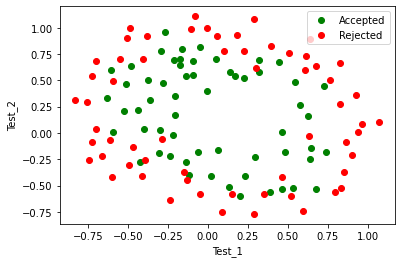

In [7]:
data_file_2 = Path(os.path.abspath("")).absolute() / "data" / "ex2data2.txt"
data_set_2 = pd.read_csv(data_file_2, header=None, names=["Test_1", "Test_2", "Accepted"])
# print(data_set_1)
# print(data_set_1.head())
# print(data_set_1.describe())

x = np.array(data_set_2.iloc[:, 0:2])
y = np.array(data_set_2.iloc[:, 2:])
m, n = x.shape
# print(m, n)
# print(x)
# print(y)

accepted_list = np.array([record for record in np.array(data_set_2) if record[2] == 1])
rejected_list = np.array([record for record in np.array(data_set_2) if record[2] == 0])

print(accepted_list)
print(rejected_list)

plt.plot(accepted_list[:, 0], accepted_list[:, 1], 'go', label="Accepted")
plt.plot(rejected_list[:, 0], rejected_list[:, 1], 'ro', label="Rejected")
plt.xlabel("Test_1")
plt.ylabel("Test_2")
plt.legend(loc="upper right")
plt.show()

## 2.2 Feature mapping

In [8]:
# map (x1, x2) to 
# (x1, x2, x1^2, x1 x2, x2^2, x1^3, x1^2 x2, x1 x2^2, x2^3, ..., x1 x2^5, x2^6) 
# then insert x0
def mapFeature(x):
    X = np.copy(x)
    # -1 means unknown dimension
    x1 = x[:, 0].reshape((-1, 1))
    x2 = x[:, 1].reshape((-1, 1))
    powers = [i for i in range(2, 7)]
    for power in powers:
        x1_powers = [i for i in range(0, power + 1)][::-1]
        for x1_power in x1_powers:
            x2_power = power - x1_power
            new_column = x1 ** x1_power * x2 ** x2_power
            X = np.append(X, new_column, axis=1)
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
    return X

X = mapFeature(x)
print(X.shape)
print(X)

(118, 28)
[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


## 2.3 Cost function and gradient

In [9]:
def regularized_cost(theta, lamda, X, y):
    m = X.shape[0]
    regular_theta = np.insert(theta[1:], 0, 0, axis=0)
    logistic_cost = cost(theta, X, y)
    regularize_factor = lamda / (2 * m) * (regular_theta.T @ regular_theta).item()
    return logistic_cost + regularize_factor

def regularized_gradient(theta, lamda, X, y):
    m = X.shape[0]
    regular_theta = np.insert(theta[1:], 0, 0, axis=0)
    logistic_gradient = gradient(theta, X, y)
    regularize_vector = lamda / m * regular_theta
    return logistic_gradient + regularize_vector

init_theta = np.zeros((X.shape[1], 1))
lamda = 1

# test all-zeros theta and lambda = 1
print(regularized_cost(init_theta, lamda, X, y))
print(regularized_gradient(init_theta, lamda, X, y))

# test all-ones theta and lambda = 10
print(regularized_cost(np.ones((X.shape[1], 1)), 10, X, y))
print(regularized_gradient(np.ones((X.shape[1], 1)), 10, X, y))


0.6931471805599454
[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]
 [3.76648474e-02]
 [1.83559872e-02]
 [7.32393391e-03]
 [8.19244468e-03]
 [2.34764889e-02]
 [3.93486234e-02]
 [2.23923907e-03]
 [1.28600503e-02]
 [3.09593720e-03]
 [3.93028171e-02]
 [1.99707467e-02]
 [4.32983232e-03]
 [3.38643902e-03]
 [5.83822078e-03]
 [4.47629067e-03]
 [3.10079849e-02]
 [3.10312442e-02]
 [1.09740238e-03]
 [6.31570797e-03]
 [4.08503006e-04]
 [7.26504316e-03]
 [1.37646175e-03]
 [3.87936363e-02]]
3.16450933161501
[[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]
 [0.24438558]
 [0.14339212]
 [0.10844171]
 [0.10231439]
 [0.18346846]
 [0.17353003]
 [0.08725552]
 [0.11822776]
 [0.0858433 ]
 [0.19994895]
 [0.13522653]
 [0.09497527]
 [0.09356441]
 [0.09979784]
 [0.09140157]
 [0.17485242]
 [0.14955442]
 [0.08678566]
 [0.09897686]
 [0.08531951]
 [0.10190666]
 [0.08450198]
 [0.18228323]]


### 2.3.1 Learning parameters

In [10]:
res = opt.minimize(fun = regularized_cost, x0 = init_theta, args = (lamda, X, y.flatten()), method = 'TNC', jac = regularized_gradient)
learned_theta = res.x

print(res)
print(learned_theta)

predict_res = predict(learned_theta, X)
predict_accuracy = np.sum([1 if predict_res[i] == y[i][0] else 0 for i in range(len(y))]) / len(y)
print("accuracy on training data: {}".format(predict_accuracy))

fun: 0.5290027299644753
     jac: array([-2.14878416e-06,  6.79541607e-07, -3.48264193e-07,  8.76357285e-07,
       -4.08922571e-08, -9.32679705e-07, -5.14500398e-07,  1.71623081e-08,
        1.56791543e-08, -9.72070603e-07,  6.96247731e-08,  3.55255267e-08,
       -2.79100213e-07,  1.79643416e-07,  2.33869484e-07,  1.47224068e-07,
       -2.11449740e-07,  6.16708522e-07, -9.30418950e-08, -5.27376461e-08,
       -1.48123004e-06,  2.31215226e-07,  1.80329703e-07, -1.32114389e-07,
       -7.16164789e-08, -4.12367451e-07,  1.64888113e-08, -7.34437387e-07])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 32
     nit: 7
  status: 1
 success: True
       x: array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.9174319 ,
       -1.43166928,  0.12393227, -0.36553118, -0.35725402, -0.17516291,
       -1.4581701 , -0.05098418, -0.6155855 , -0.27469165, -1.19271297,
       -0.2421784 , -0.20603295, -0.04466179, -0.27778954, -0.29539513,
       -0.45645982, -1.04319156,  0.02779373, -

## 2.4 Plotting the decision boundary

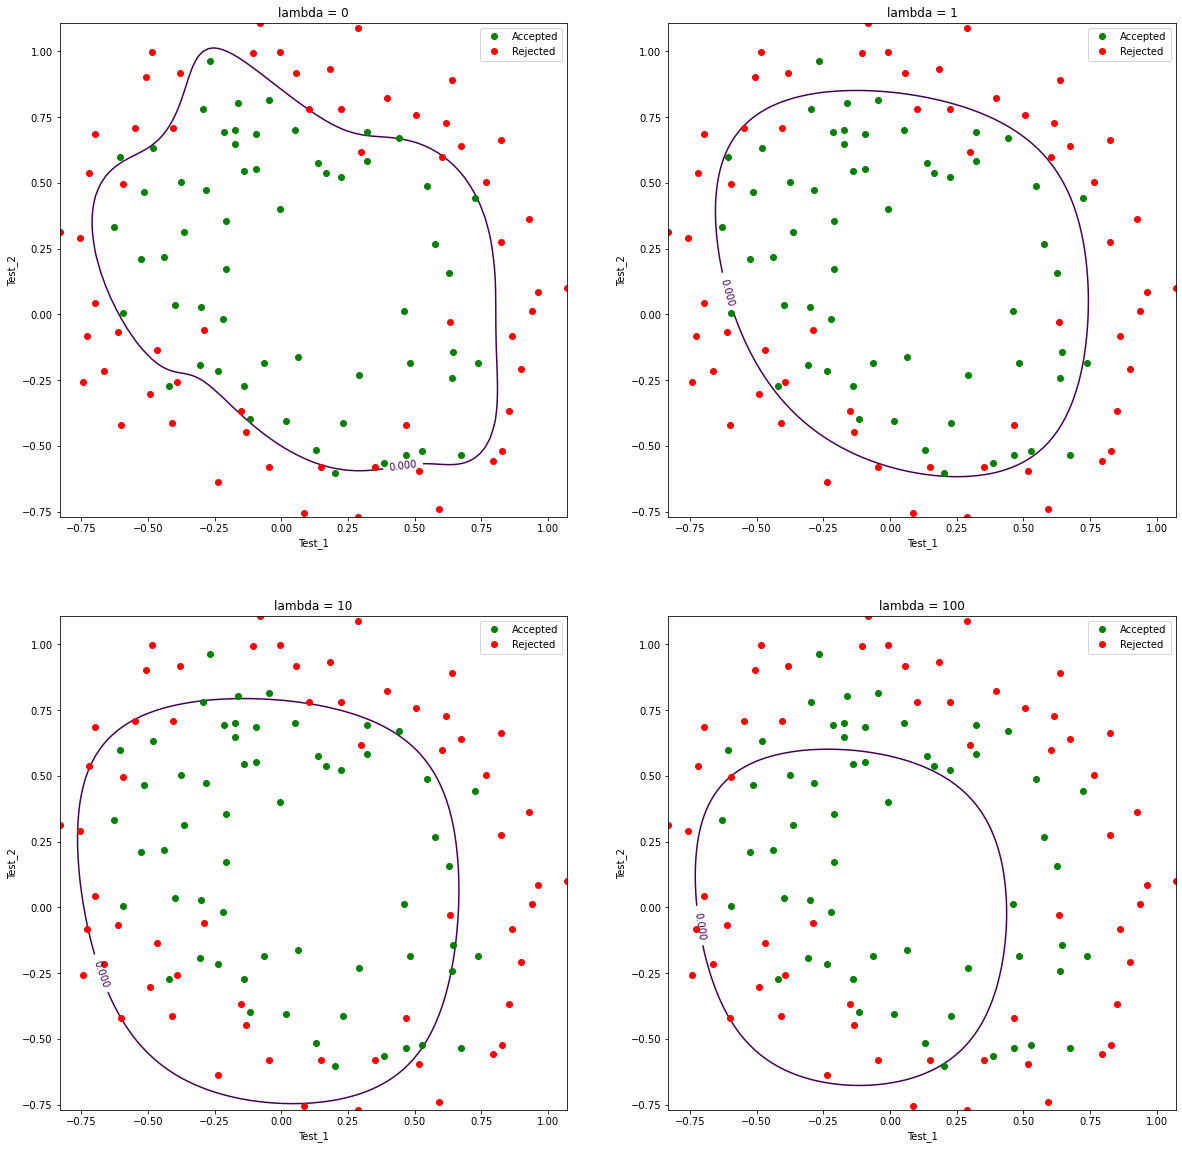

In [11]:
lamda_list = [0, 1, 10, 100]
fig = plt.figure(figsize=(20, 20))

def contour_res(x1, x2, theta, max_power):
    res = np.zeros(x1.shape) + theta[0]
    power_list = [i for i in range(1, max_power + 1)]
    theta_index = 0
    for power in power_list:
        x1_powers = [k for k in range(0, power + 1)][::-1]
        for x1_power in x1_powers:
            theta_index += 1
            x2_power = power - x1_power
            res += theta[theta_index] * x1 ** x1_power * x2 ** x2_power
    return res


for i in range(len(lamda_list)):
    lamda = lamda_list[i]
    res = opt.minimize(fun = regularized_cost, x0 = init_theta, args = (lamda, X, y.flatten()), method = 'TNC', jac = regularized_gradient)
    learned_theta = res.x
    x1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    x2 = np.linspace(x[:, 1].min(), x[:, 1].max(), 100)
    X1, X2 = np.meshgrid(x1, x2)
    Y = contour_res(X1, X2, learned_theta, 6)
    # draw contour
    ax = fig.add_subplot(2, 2, i + 1)
    c = ax.contour(X1, X2, Y, levels=[0])
    ax.clabel(c, inline=1, fontsize=10)
    ax.set_title("lambda = {}".format(lamda))
    # draw dots
    ax.plot(accepted_list[:, 0], accepted_list[:, 1], 'go', label="Accepted")
    ax.plot(rejected_list[:, 0], rejected_list[:, 1], 'ro', label="Rejected")
    ax.set_xlabel("Test_1")
    ax.set_ylabel("Test_2")
    ax.legend(loc="upper right")

plt.show()